<a href="https://colab.research.google.com/github/ArpitaDeshmukh2024/SPPU_DSBDA_Practicals/blob/main/2/DSBDA_Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_math_clean.csv to student_math_clean.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
data = pd.read_csv("student_math_clean.csv")
data

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,Urban,Less than or equal to 3,Apart,5th to 9th grade,5th to 9th grade,services,...,5,5,4,4,5,4,11,9,9,9
391,392,MS,M,17,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),services,...,2,4,5,3,4,2,3,14,16,16
392,393,MS,M,21,Rural,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),other,...,5,5,3,3,3,3,3,10,8,7
393,394,MS,M,18,Rural,Less than or equal to 3,Living together,secondary education,5th to 9th grade,services,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
data.describe()

,student_id,age,class_failures,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,114.170924,1.276043,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,99.500000,16.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,198.000000,17.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,296.500000,18.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,395.000000,22.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
data.isnull().head(10)

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**BoxPlot Method**

<Axes: ylabel='age'>

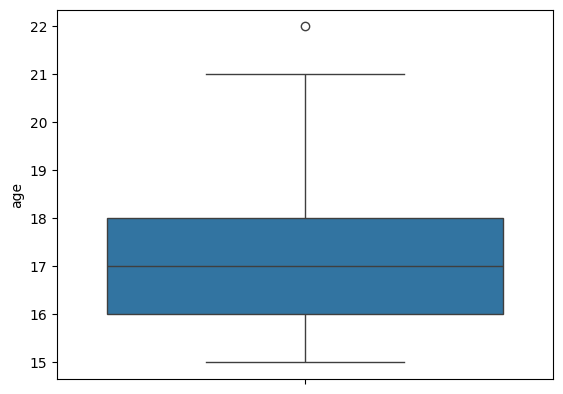

In [ ]:
sns.boxplot(data['age'])

**ScatterPlot Method**

x = colume on x-axis

y = column on y-axis

c = colour of scattered dots

s = size or batch of data

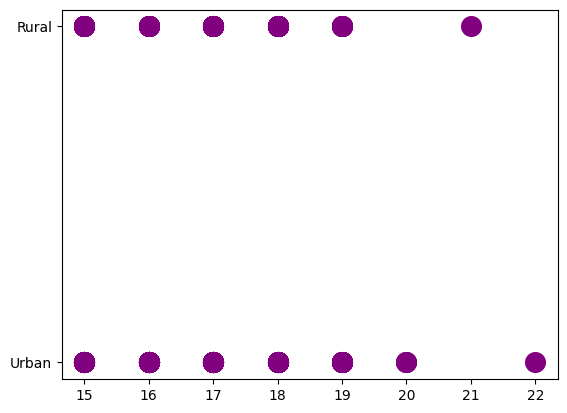

In [ ]:
x = data.age
y = data.address_type
plt.scatter(x, y, c = "Purple", s = 200)
plt.show()

**Data Normalization**

Data normalization is the process of transforming data into a common scale, often between 0 and 1, without distorting differences in the ranges of values. This process is crucial in various data analysis and machine learning tasks to ensure that all features contribute equally to the analysis, prevent certain features from dominating others due to their larger scales, and enable models to converge faster and perform better.

Normalization typically involves rescaling the features of a dataset so that they have a mean of 0 and a standard deviation of 1, or scaling them to a specific range such as [0, 1]. The normalization technique used depends on the nature of the data and the requirements of the analysis.

**Min-Max Scaling**

It is a data normalization technique which converts values from a specific column to range between 0 to 1

It linearly scales or plots each feature's values based on the minimum and maximum values observed in that feature.

copy() = creates the copy of dataframe

min() = takes the minimum value from dataset

max() = takes the maximum value from dataset

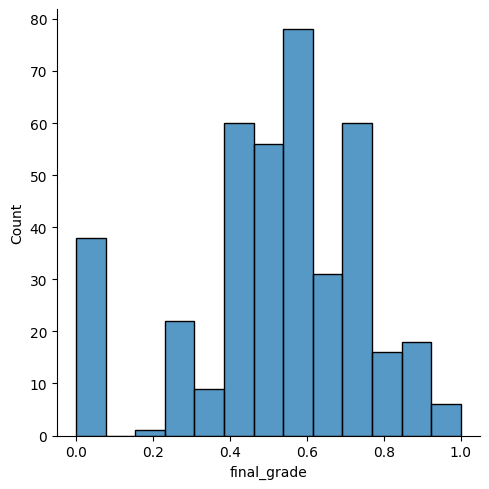

In [ ]:
data_copy = data.copy()
data_copy['final_grade'] = (data_copy['final_grade'] - data_copy['final_grade'].min()) / (data_copy['final_grade'].max() - data_copy['final_grade'].min())
sns.displot(data_copy['final_grade'])
plt.show()

**Z-score Scaling**

It's called Z-score scaling because it calculates the Z-score for each data point, representing how many standard deviations it is away from the mean.

mean() = mean of the column

std() = standard deviation of the column

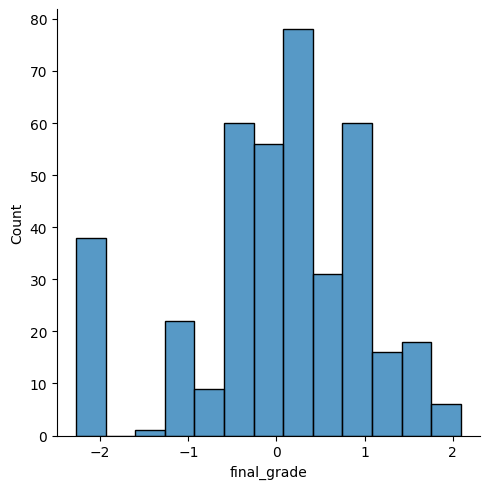

In [ ]:
z_copy = data.copy()
for col in ['final_grade']:
  z_copy[col] = (z_copy[col] - z_copy[col].mean())/z_copy[col].std()
sns.displot(z_copy['final_grade'])
plt.show()

**IQR(Inter Quartile Range)**

The Interquartile Range (IQR) is a measure of statistical dispersion that represents the range between the first quartile (Q1) and the third quartile (Q3) of a dataset. It is a robust measure of spread because it is less sensitive to outliers compared to the range.

sort() = This sorts the column in ascending order.

midpoint interpolation = This method takes the average of the values of the two nearest data points to estimate the value at the desired percentile.

In [ ]:
df = np.sort(data.age)
Q1 = np.percentile(df, 25, interpolation = 'midpoint')
Q2 = np.percentile(df, 50, interpolation = 'midpoint')
Q3 = np.percentile(df, 75, interpolation = 'midpoint')

print('Q1 of the given data is , ', Q1)
print('Q2 of the given data is , ', Q2)
print('Q3 of the given data is , ', Q3)

IQR = Q3 - Q1
print('Inter Quartile range is : ', IQR)

Q1 of the given data is ,  16.0
Q2 of the given data is ,  17.0
Q3 of the given data is ,  18.0
Inter Quartile range is :  2.0


In [ ]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Low Limit is : ', low_lim)
print('Up Limit is : ', up_lim)

outlier = []
for x in df :
  if((x>up_lim) or (x<low_lim)) :
    outlier.append(x)
print('Outlier in the dataset is : ', outlier)

Low Limit is :  13.0
Up Limit is :  21.0
Outlier in the dataset is :  [22]


**Z-score Method**

In [ ]:
df = data.age
m = np.mean(df)
sd = np.std(df)
print("Mean is : ",m)
print("Standard deviation is : ", sd)

Mean is :  16.696202531645568
Standard deviation is :  1.2744264570480206


threshold = indicates that any data point whose z-score (a measure of how many standard deviations it is away from the mean) exceeds define value(i.e. 4 in this case) is considered an outlier.

outlier = An outlier is an observation that deviates significantly from other observations in a dataset. In simpler terms, it's a data point that lies far away from the rest of the data points. Outliers can occur due to various reasons, such as measurement errors, experimental errors, natural variability in the data, or rare events.

In [ ]:
threshold = 4
outlier = []
for i in df:
  z = (i-m)/sd
  if z > threshold:
    outlier.append(i)
print("Outlier in dataset is : ", outlier)

Outlier in dataset is :  [22]


**Removing Outliers**

data.drop(10, inplace=True): This line drops the row with index 10 from the DataFrame data.

The inplace=True parameter ensures that the changes are applied to the original DataFrame data instead of returning a new DataFrame with the row removed.

In [ ]:
data.drop(10, inplace = True)
data

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,Urban,Less than or equal to 3,Apart,5th to 9th grade,5th to 9th grade,services,...,5,5,4,4,5,4,11,9,9,9
391,392,MS,M,17,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),services,...,2,4,5,3,4,2,3,14,16,16
392,393,MS,M,21,Rural,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),other,...,5,5,3,3,3,3,3,10,8,7
393,394,MS,M,18,Rural,Less than or equal to 3,Living together,secondary education,5th to 9th grade,services,...,4,4,1,3,4,5,0,11,12,10


**Log Transform**

Converts values to logrithmic value with base value 2

Log transform is used for data normalization

In [ ]:
data['log_final_grade'] = np.log2(data['final_grade'])
data

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade,log_final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,3,4,1,1,3,6,5,6,6,2.584963
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,3,3,1,1,3,4,5,5,6,2.584963
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,3,2,2,3,3,10,7,8,10,3.321928
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,2,2,1,1,5,2,15,14,15,3.906891
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,3,2,1,2,5,4,6,10,10,3.321928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,Urban,Less than or equal to 3,Apart,5th to 9th grade,5th to 9th grade,services,...,5,4,4,5,4,11,9,9,9,3.169925
391,392,MS,M,17,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),services,...,4,5,3,4,2,3,14,16,16,4.000000
392,393,MS,M,21,Rural,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),other,...,5,3,3,3,3,3,10,8,7,2.807355
393,394,MS,M,18,Rural,Less than or equal to 3,Living together,secondary education,5th to 9th grade,services,...,4,1,3,4,5,0,11,12,10,3.321928
